In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from time import time


PATH = "./"

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

start = time()

# load train, test, and validation datasets
train_files, train_targets = load_dataset(PATH + 'dogImages/train')
valid_files, valid_targets = load_dataset(PATH + 'dogImages/valid')
test_files, test_targets = load_dataset(PATH + 'dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob(PATH + "dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

load_time = time() - start
print("Load time: %f"%load_time)

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.
Load time: 44.620032


In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

,target,breed,folder,count
0,1,Affenpinscher,/content/drive/My Drive/Colab Notebooks/dogIma...,64
1,2,Afghan_hound,/content/drive/My Drive/Colab Notebooks/dogIma...,58
2,3,Airedale_terrier,/content/drive/My Drive/Colab Notebooks/dogIma...,52
3,4,Akita,/content/drive/My Drive/Colab Notebooks/dogIma...,63
4,5,Alaskan_malamute,/content/drive/My Drive/Colab Notebooks/dogIma...,77


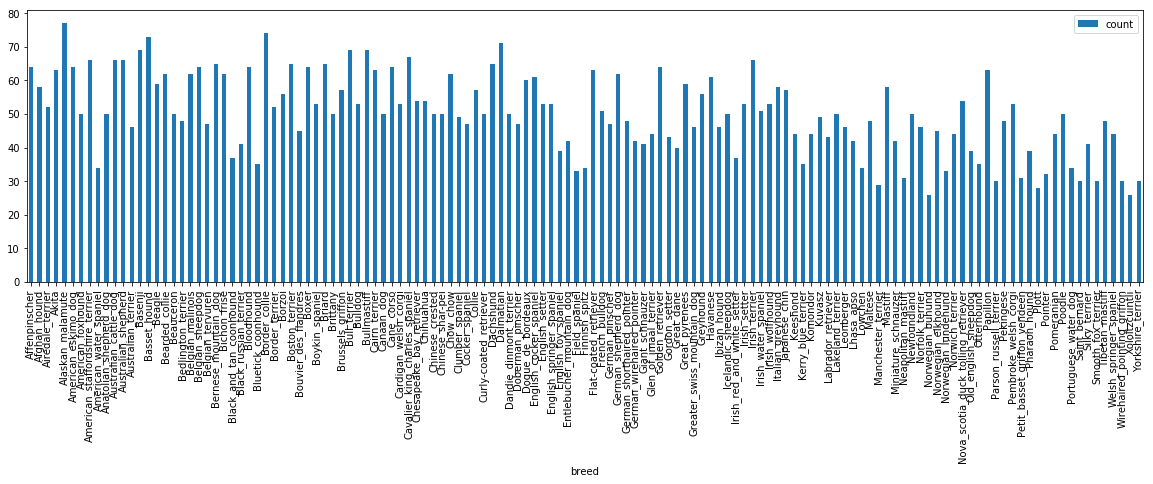

In [32]:
from matplotlib import pyplot as plt 
import pandas as pd
import os.path

folders = [(int(path[56:59]), path[60:-1], path, len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])) for path in sorted(glob(PATH + 'dogImages/train/*/'))]
folders = pd.DataFrame(folders, columns = ['target', 'breed', 'folder', 'count'])
display(folders.head())


folders[['breed', 'count']].plot.bar(x = 'breed', figsize = (20, 5))

In [41]:
import random

def get_files(path):
  files = os.listdir(path)
  n_files = 100 - len (files)
  print(files)
  print(random.sample(files, n_files ))
  
get_files('/content/drive/My Drive/Colab Notebooks/dogImages/train/001.Affenpinscher/')
  

['Affenpinscher_00037.jpg', 'Affenpinscher_00008.jpg', 'Affenpinscher_00034.jpg', 'Affenpinscher_00020.jpg', 'Affenpinscher_00022.jpg', 'Affenpinscher_00009.jpg', 'Affenpinscher_00019.jpg', 'Affenpinscher_00021.jpg', 'Affenpinscher_00035.jpg', 'Affenpinscher_00025.jpg', 'Affenpinscher_00031.jpg', 'Affenpinscher_00018.jpg', 'Affenpinscher_00027.jpg', 'Affenpinscher_00033.jpg', 'Affenpinscher_00024.jpg', 'Affenpinscher_00032.jpg', 'Affenpinscher_00026.jpg', 'Affenpinscher_00030.jpg', 'Affenpinscher_00054.jpg', 'Affenpinscher_00043.jpg', 'Affenpinscher_00080.jpg', 'Affenpinscher_00069.jpg', 'Affenpinscher_00057.jpg', 'Affenpinscher_00079.jpg', 'Affenpinscher_00051.jpg', 'Affenpinscher_00075.jpg', 'Affenpinscher_00045.jpg', 'Affenpinscher_00053.jpg', 'Affenpinscher_00046.jpg', 'Affenpinscher_00056.jpg', 'Affenpinscher_00052.jpg', 'Affenpinscher_00050.jpg', 'Affenpinscher_00044.jpg', 'Affenpinscher_00061.jpg', 'Affenpinscher_00060.jpg', 'Affenpinscher_00077.jpg', 'Affenpinscher_00073.jpg', 

In [8]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:06<00:00, 128.61it/s]


In [22]:

np.where((train_tensors == zero).all(axis=1))

(array([ 486, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127, 1127,
        1127, 1127, 1127, 1127, 1127, 1293, 1293, 1293, 1293, 1293, 1293,
        1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518,
        1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518, 1518,
        1518, 1518, 1518, 1518, 1518, 

In [23]:
train_tensors[486]

array([[[0.5058824 , 0.        , 0.49803922],
        [0.5058824 , 0.        , 0.49803922],
        [0.5058824 , 0.        , 0.49803922],
        ...,
        [0.5058824 , 0.        , 0.49803922],
        [0.5058824 , 0.        , 0.49803922],
        [0.5058824 , 0.        , 0.49803922]],

       [[0.5058824 , 0.        , 0.49803922],
        [0.62352943, 0.6392157 , 0.58431375],
        [0.5803922 , 0.44705883, 0.20784314],
        ...,
        [0.29411766, 0.16470589, 0.13725491],
        [1.        , 0.99607843, 0.98039216],
        [0.50980395, 0.        , 0.5058824 ]],

       [[0.5058824 , 0.        , 0.49803922],
        [0.61960787, 0.6039216 , 0.49803922],
        [0.57254905, 0.40784314, 0.18039216],
        ...,
        [0.34117648, 0.21568628, 0.17254902],
        [0.99215686, 0.99607843, 0.9411765 ],
        [0.49411765, 0.01176471, 0.49803922]],

       ...,

       [[0.5058824 , 0.        , 0.49803922],
        [0.62352943, 0.5882353 , 0.4745098 ],
        [0.627451  , 0

In [17]:

zero = np.zeros((224, 224, 3))
ones = np.full((224, 224, 3), 1)
result_zeros = np.where(train_tensors == zero).all(axis=1)
result_ones = np.where(train_tensors == ones)
print(result_zeros)
print(result_ones)

AttributeError: ignored

In [12]:
print(train_tensors[0])

[[[0.60784316 0.61960787 0.69411767]
  [0.6627451  0.6509804  0.7254902 ]
  [0.6392157  0.65882355 0.7372549 ]
  ...
  [0.5882353  0.6        0.6745098 ]
  [0.57254905 0.58431375 0.65882355]
  [0.5529412  0.5803922  0.6509804 ]]

 [[0.6627451  0.67058825 0.7294118 ]
  [0.6392157  0.63529414 0.69803923]
  [0.6039216  0.6313726  0.7019608 ]
  ...
  [0.54509807 0.5803922  0.64705884]
  [0.5568628  0.5764706  0.6509804 ]
  [0.5411765  0.5686275  0.6392157 ]]

 [[0.59607846 0.6039216  0.6627451 ]
  [0.64705884 0.65882355 0.7176471 ]
  [0.6392157  0.6745098  0.7411765 ]
  ...
  [0.5529412  0.6        0.654902  ]
  [0.5529412  0.5803922  0.6509804 ]
  [0.54509807 0.57254905 0.64705884]]

 ...

 [[0.14509805 0.13333334 0.07450981]
  [0.14117648 0.13333334 0.08627451]
  [0.16470589 0.14117648 0.08627451]
  ...
  [0.6431373  0.65882355 0.7058824 ]
  [0.6117647  0.61960787 0.6784314 ]
  [0.60784316 0.6313726  0.69411767]]

 [[0.14117648 0.12941177 0.05490196]
  [0.15294118 0.12941177 0.06666667]


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [0]:
start = time()
bottleneck_features = np.load(PATH + 'DogXceptionData.npz')
train_DogXception = bottleneck_features['train']
valid_DogXception = bottleneck_features['valid']
test_DogXception = bottleneck_features['test']

load_time = time() - start
print("Load time: %f"%load_time)

Load time: 53.757532


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.callbacks import ModelCheckpoint  
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(7, 7, 2048)))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(133, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 7, 7, 64)          524352    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          16448     
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               803072    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 133)               34181     
Total para

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.callbacks import ModelCheckpoint  

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow(
        train_DogXception, 
        train_targets,
        batch_size=batch_size)  

# this is a similar generator, for validation data
validation_generator = test_datagen.flow(
        valid_DogXception,
        valid_targets,
        batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (6680, 7, 7, 2048) (2048 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (835, 7, 7, 2048) (2048 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [0]:

checkpointer = ModelCheckpoint(filepath='first_try.h5', 
                               verbose=1, save_best_only=True)

for layer in model.layers[:25]:
    layer.trainable = False
  
batch_size = 16

history = model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=[checkpointer], 
        verbose=1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/50
62/62 [==============================] - 39s 632ms/step - loss: 1.8998 - acc: 0.4647 - val_loss: 1.3859 - val_acc: 0.5845

Epoch 00001: val_loss improved from inf to 1.38591, saving model to first_try.h5
Epoch 2/50
62/62 [==============================] - 41s 657ms/step - loss: 1.6512 - acc: 0.5091 - val_loss: 1.2726 - val_acc: 0.6188

Epoch 00002: val_loss improved from 1.38591 to 1.27262, saving model to first_try.h5
Epoch 3/50
62/62 [==============================] - 39s 632ms/step - loss: 1.5635 - acc: 0.5302 - val_loss: 1.2180 - val_acc: 0.6404

Epoch 00003: val_loss improved from 1.27262 to 1.21801, saving model to first_try.h5
Epoch 4/50
62/62 [==============================] - 41s 656ms/step - loss: 1.4698 - acc: 0.5312 - val_loss: 1.0826 - val_acc: 0.6900

Epoch 00004: val_loss improved from 1.21801 to 1.08260, saving model to first_try.h5
Epoch 5/50
62/62 [==============================] - 40s 638ms/step - loss: 1.4810 - acc: 0.5685 - val_loss: 1.0594 - val_acc: 0.

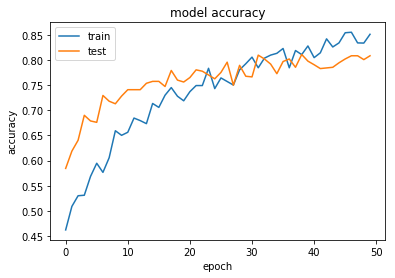

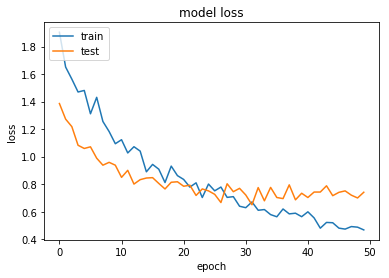

In [0]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
### TODO: Calculate classification accuracy on the test dataset.

predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in test_DogXception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.7081%


In [0]:
### TODO: Load the model weights with the best validation loss.
checkpointer = ModelCheckpoint(filepath='weights.best.DogXception.hdf5', 
                               verbose=1, save_best_only=True)

DogXception_history = model.fit(train_DogXception, train_targets, 
          validation_data=(valid_DogXception, valid_targets),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/50
6680/6680 [==============================] - 5s 704us/step - loss: 3.2629 - acc: 0.2837 - val_loss: 1.6089 - val_acc: 0.5892

Epoch 00001: val_loss improved from inf to 1.60891, saving model to weights.best.DogXception.hdf5
Epoch 2/50
6680/6680 [==============================] - 4s 558us/step - loss: 1.6331 - acc: 0.5843 - val_loss: 1.2706 - val_acc: 0.6455

Epoch 00002: val_loss improved from 1.60891 to 1.27062, saving model to weights.best.DogXception.hdf5
Epoch 3/50
6680/6680 [==============================] - 4s 534us/step - loss: 1.2157 - acc: 0.6692 - val_loss: 1.2397 - val_acc: 0.6826

Epoch 00003: val_loss improved from 1.27062 to 1.23975, saving model to weights.best.DogXception.hdf5
Epoch 4/50
6680/6680 [==============================] - 3s 521us/step - loss: 0.9917 - acc: 0.7287 - val_loss: 0.9497 - val_acc: 0.7317

Epoch 00004: val_loss improved from 1.23975 to 0.94974, saving model to weights.best.DogXception.hdf5
E

In [3]:
zero = np.zeros((224, 224, 3))
print(zero)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [1]:
import numpy as np

n_array = np.arange(18).reshape(224, 224, 3)


zero = np.zeros((3, 3, 2))
print(n_array.shape)
print(zero.shape)

print(n_array)
print(zero)

array_list = np.append(n_array, n_array, axis = 1)
array_list = np.append(array_list, zero, axis = 1)
print(array_list)
print(array_list.shape)

result = np.where(array_list == zero)
print(result)

ValueError: ignored